In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path       

In [15]:
graph_nr = 0

combined_rep_dir = Path("/Volumes/tcs_jf_fair_node_sampling/TEST_SynthCorr/pokec_synthcorrlabels_02/data/reports/combined_results")
baseline_path = combined_rep_dir / f"pokec_synthcorrattr_{graph_nr}_results_baseline.csv" 
cw_path = combined_rep_dir / f"pokec_synthcorrattr_{graph_nr}_results_cw.csv"

In [16]:
df_baseline = pd.read_csv(baseline_path)
# df_baseline.info()
df_baseline.head(10)

,p,q,sens_attr,other_attr,attribute,f1_macro,accuracy,support,f1_macro_class_0,f1_macro_class_1,...,f1_macro_class_4_cond_2,support_4_cond_2,f1_macro_cond_4,support_cond_4,f1_macro_class_0_cond_4,support_0_cond_4,f1_macro_class_1_cond_4,support_1_cond_4,f1_macro_class_2_cond_4,support_2_cond_4
0,1.0,1.0,synth_AGE_classes_3_corrRL2_0.25_from1024clusters,synth_region_classes_4_corrRL2_-0.05_from64clu...,other,0.252552,0.312182,4620.0,0.208402,0.076642,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,1.0,synth_AGE_classes_3_corrRL2_0.25_from1024clusters,synth_region_classes_4_corrRL2_-0.05_from64clu...,sensitive,0.536522,0.537403,4620.0,0.516322,0.556723,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,1.0,label_AGE,synth_region_classes_4_corrRL2_0.56_from256clu...,other,0.353228,0.384892,4620.0,0.323137,0.337308,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,1.0,label_AGE,synth_region_classes_4_corrRL2_0.56_from256clu...,sensitive,0.670102,0.772918,4620.0,0.616991,0.519686,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,1.0,synth_AGE_classes_3_corrRL2_-0.01_from64clusters,synth_region_classes_5_corrRL2_0.01_from64clus...,other,0.212152,0.300996,4620.0,0.165934,0.319680,...,0.044728,4.92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1.0,1.0,synth_AGE_classes_3_corrRL2_-0.01_from64clusters,synth_region_classes_5_corrRL2_0.01_from64clus...,sensitive,0.356688,0.359948,4620.0,0.361851,0.324921,...,NaN,NaN,0.229478,49.0,0.6,44.4,0.0,0.0,0.088435,4.6
6,1.0,1.0,label_AGE,label_region,other,0.777885,0.750848,4620.0,0.681437,0.655829,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1.0,1.0,label_AGE,label_region,sensitive,0.671594,0.772814,4620.0,0.620092,0.521891,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


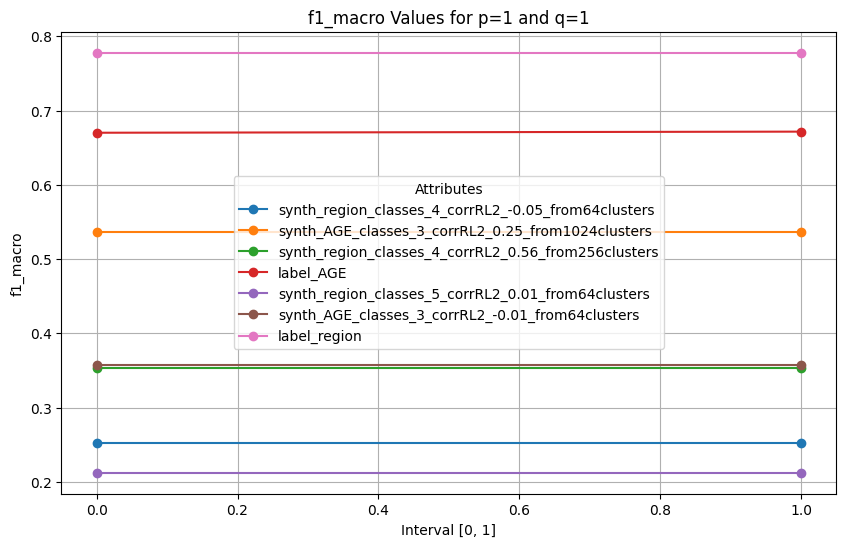

<Figure size 640x480 with 0 Axes>

In [17]:
# Filter the DataFrame for p=1 and q=1
filtered_df = df_baseline[(df_baseline['p'] == 1.0) & (df_baseline['q'] == 1.0)]

#Prepare the data for plotting
plot_data = {}

for index, row in filtered_df.iterrows():
    key = row['sens_attr'] if row['attribute'] == 'sensitive' else row['other_attr']
    if key not in plot_data:
        plot_data[key] = []
    plot_data[key].append(row['f1_macro'])

# Adjust the plot_data to have the correct length for each line (ensuring two points)
for key in plot_data:
    if len(plot_data[key]) == 1:
        plot_data[key].append(plot_data[key][0])  # Duplicate the single value to match the interval length


# Create the plot
x_values = [0, 1]

plt.figure(figsize=(10, 6))
for key, values in plot_data.items():
    plt.plot(x_values, values, marker='o', label=key)

plt.xlabel('Interval [0, 1]')
plt.ylabel('f1_macro')
plt.title('f1_macro Values for p=1 and q=1')
plt.legend(title='Attributes')
plt.grid(True)
plt.show()
plt.clf()


In [18]:
df_cw = pd.read_csv(cw_path)
# df_cw.info()
df_cw.head(10)

,alpha,exponent,p,q,sens_attr,other_attr,attribute,f1_macro,accuracy,support,...,f1_macro_class_4,support_class_4,f1_macro_class_4_cond_0,support_4_cond_0,f1_macro_class_4_cond_1,support_4_cond_1,f1_macro_class_4_cond_2,support_4_cond_2,f1_macro_class_4_cond_3,support_4_cond_3
0,0.5,8,1.0,1.0,synth_AGE_classes_3_corrRL2_0.25_from1024clusters,label_AGE,other,0.637803,0.759835,4620.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.5,8,1.0,1.0,synth_AGE_classes_3_corrRL2_0.25_from1024clusters,label_AGE,sensitive,0.537175,0.539766,4620.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.5,8,1.0,1.0,label_region,label_AGE,other,0.576867,0.722017,4620.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.5,8,1.0,1.0,label_region,label_AGE,sensitive,0.536764,0.625610,4620.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.8,2,1.0,1.0,synth_AGE_classes_3_corrRL2_0.25_from1024clusters,synth_region_classes_4_corrRL2_-0.05_from64clu...,other,0.250721,0.313957,4620.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.8,2,1.0,1.0,synth_AGE_classes_3_corrRL2_0.25_from1024clusters,synth_region_classes_4_corrRL2_-0.05_from64clu...,sensitive,0.464353,0.466745,4620.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0.8,2,1.0,1.0,synth_region_classes_4_corrRL2_0.56_from256clu...,synth_AGE_classes_3_corrRL2_0.25_from1024clusters,other,0.532807,0.533299,4620.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0.8,2,1.0,1.0,synth_region_classes_4_corrRL2_0.56_from256clu...,synth_AGE_classes_3_corrRL2_0.25_from1024clusters,sensitive,0.294773,0.318978,4620.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0.8,2,1.0,1.0,synth_region_classes_4_corrRL2_0.56_from256clu...,label_AGE,other,0.652502,0.763558,4620.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.8,2,1.0,1.0,synth_region_classes_4_corrRL2_0.56_from256clu...,label_AGE,sensitive,0.293348,0.313775,4620.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


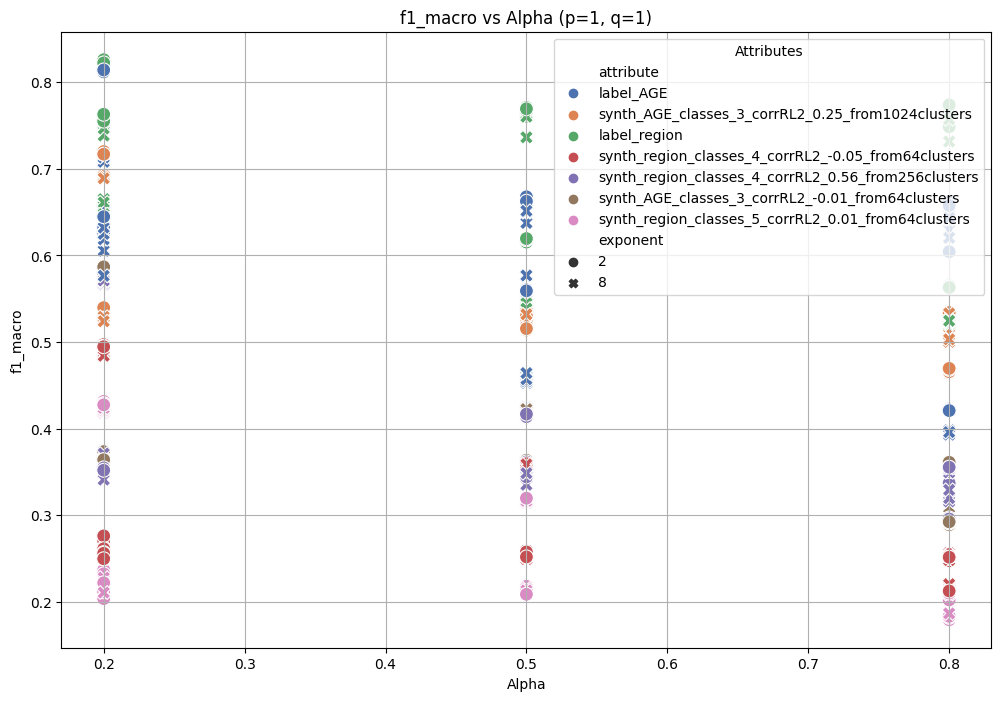

<Figure size 640x480 with 0 Axes>

In [19]:
# Filter the DataFrame for p=1 and q=1
filtered_df = df_cw[(df_cw['p'] == 1.0) & (df_cw['q'] == 1.0)]

# Step 2: Prepare data for plotting
plot_data = {
    'alpha': [],
    'f1_macro': [],
    'attribute': [],
    'exponent': []
}

# Step 3: Access and map the correct f1_macro values based on the attribute
for index, row in filtered_df.iterrows():
    # Based on the attribute, access the correct f1_macro value
    plot_data['alpha'].append(row['alpha'])
    plot_data['f1_macro'].append(row['f1_macro'])
    plot_data['attribute'].append(row['sens_attr'] if row['attribute'] == 'sensitive' else row['other_attr'])
    plot_data['exponent'].append(row['exponent'])

# Convert plot_data to DataFrame for easy plotting
plot_df = pd.DataFrame(plot_data)

# Step 4: Plot the data
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=plot_df, 
    x='alpha', 
    y='f1_macro', 
    hue='attribute', 
    style='exponent', 
    palette='deep',
    s=100
)

plt.xlabel('Alpha')
plt.ylabel('f1_macro')
plt.title('f1_macro vs Alpha (p=1, q=1)')
plt.legend(title='Attributes')
plt.grid(True)
plt.show()
plt.clf()

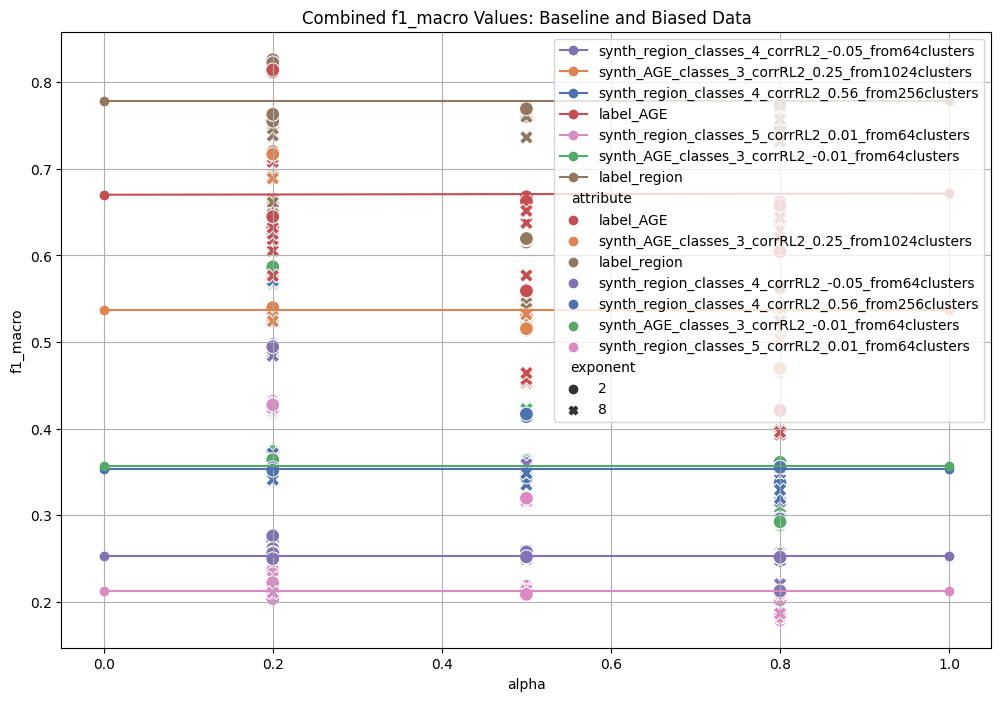

<Figure size 640x480 with 0 Axes>

In [21]:
filtered_baseline_df = df_baseline[(df_baseline['p'] == 1.0) & (df_baseline['q'] == 1.0)]
filtered_cw_df = df_cw[(df_cw['p'] == 1.0) & (df_cw['q'] == 1.0)]


baseline_plot_data = {}
cw_plot_data = {
    'alpha': [],
    'f1_macro': [],
    'attribute': [],
    'exponent': []
}


for index, row in filtered_baseline_df.iterrows():
    key = row['sens_attr'] if row['attribute'] == 'sensitive' else row['other_attr']
    if key not in baseline_plot_data:
        baseline_plot_data[key] = []
    baseline_plot_data[key].append(row['f1_macro'])

for key in baseline_plot_data:
    if len(baseline_plot_data[key]) == 1:
        baseline_plot_data[key].append(baseline_plot_data[key][0])  # Duplicate the single value to match the interval length


for index, row in filtered_cw_df.iterrows():
    cw_plot_data['alpha'].append(row['alpha'])
    cw_plot_data['f1_macro'].append(row['f1_macro'])
    cw_plot_data['attribute'].append(row['sens_attr'] if row['attribute'] == 'sensitive' else row['other_attr'])
    cw_plot_data['exponent'].append(row['exponent'])

cw_plot_df = pd.DataFrame(cw_plot_data)


# Determine the unique attributes for the color palette
unique_attributes = list(set(cw_plot_df['attribute'].unique()) | set(baseline_plot_data.keys()))

# Generate the color palette to match the number of unique attributes
palette = sns.color_palette('deep', n_colors=len(unique_attributes))

# Map attributes to colors
attribute_color_map = {attribute: palette[i] for i, attribute in enumerate(unique_attributes)}


plt.figure(figsize=(12, 8))

# Plotting baseline as lines with matching colors
for key, values in baseline_plot_data.items():
    plt.plot(x_values, values, marker='o', label=key, linestyle='-', color=attribute_color_map[key])


# Overlay biased data as points with matching colors
sns.scatterplot(
    data=cw_plot_df, 
    x='alpha', 
    y='f1_macro', 
    hue='attribute', 
    style='exponent', 
    palette=attribute_color_map,
    s=100
)



plt.xlabel('alpha')
plt.ylabel('f1_macro')
plt.title('Combined f1_macro Values: Baseline and Biased Data')
plt.legend(title='Attributes', )
plt.grid(True)
plt.show()
plt.clf()